In [78]:
import json
file = open("data/flu_2016_08_04_HA.json", 'r')
viruses = json.load(file)
location_points = {}  # map from "lat_long_location,country" to "region", "latitude", "longitude", "magnitude"
region_to_color = {'africa':'#A0CCA5', 'china':'#A76BB1', 'europe':'#658447', 'south_asia':'#EBA85F', 
                   'japan_korea':'#2A4786', 'north_america':'#D6C568', 'oceania':'#8E1616', 'south_america':'#926224',
                   'southeast_asia':'#8FBDD0', 'west_asia':'#76104B'}
for v in viruses:
    if 'lat_long_location' in v:
        if (v['lat_long_location']) in location_points:
            location_points[v['lat_long_location']]['magnitude']+=1
        else:
            new_location_point = {'region':v['region'],'latitude':v['latitude'], 'longitude':v['longitude'], 'magnitude':1}
            location_points[v['lat_long_location']] = new_location_point
longs, lats, magnitudes, colors = [], [], [], []
for point in location_points.values():
    longs.append(point['longitude'])
    lats.append(point['latitude'])
    magnitudes.append(point['magnitude'])
    if 'region' in point and point['region'] is not None:
        colors.append(region_to_color[point['region']])
    else:
        colors.append('white')

In [73]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (24,12)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


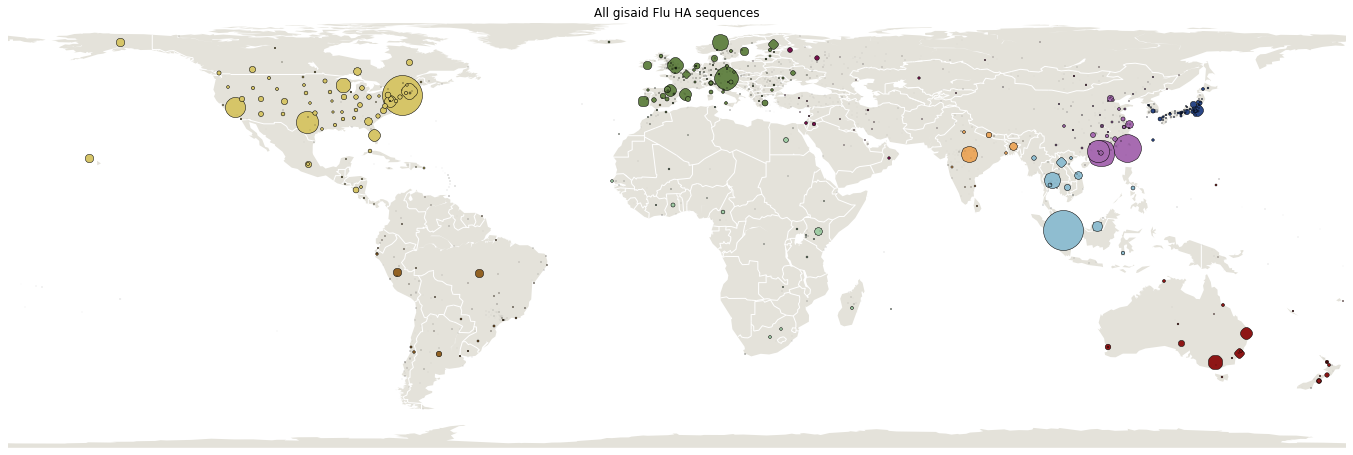

In [86]:
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

eq_map = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
eq_map.drawcountries(color = 'white', linewidth=1.0)
eq_map.fillcontinents(color = '#E4E2DA')
eq_map.drawmapboundary(color = 'white')

    
max_marker_size = 40
max_magnitude = max(magnitudes)
zipped = sorted(zip(longs, lats, magnitudes, colors),key=lambda m: m[2], reverse=True) # sort by magnitude, largest first
for lon, lat, mag, col in zipped:
    x,y = eq_map(lon, lat)
    #msize = np.sqrt(mag/max_magnitude) * min_marker_size
    msize = (mag/max_magnitude) * min_marker_size
    eq_map.plot(x, y, 'o', c=col, markersize=msize)
plt.title('All gisaid Flu HA sequences')
plt.show()